In [99]:
import pandas as pd
import numpy as np # linear algebra
import scipy as sp 
import nltk

In [100]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#匯入文件
pd_data = pd.read_csv("Reviews.csv")
pd_data = pd_data[:10000] #限定取值範圍

In [102]:
df_user = pd_data.groupby(['UserId', 'ProfileName']).agg({'Score':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Score count', 'Score mean']
df_user = df_user.sort_values(by = 'Score count', ascending = False)
print(df_user.head(10))

                                                           Score count  \
UserId         ProfileName                                               
A1Z54EM24Y40LL c2                                                   17   
A2SZLNSI5KOQJT Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
A35R32TA60XD57 M. Torma                                              9   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"                8   
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                      7   
A3NHUQ33CFH3VM Citizen John                                          7   
A3PJZ8TU8FDQ1K Jared Castle                                          7   
AQ6SHOW0VMZGF  K. Padgett "familyof5"                                6   
A26NFIQ7KWI8Y7 kt rose                                               6   
A10H24TDLK2VDP William Jens Jensen                                   6   

                                                           Score mean  
UserId         ProfileName             

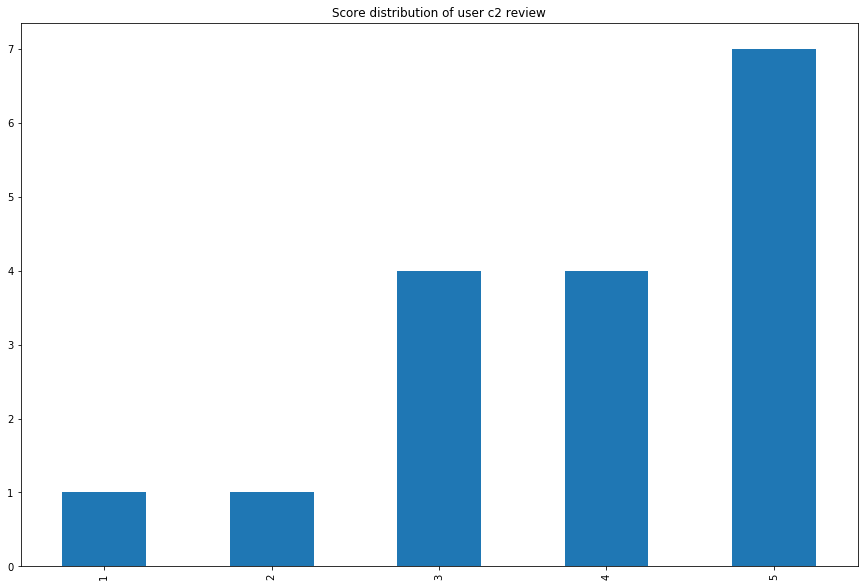

In [103]:
def plot_user(UserId):
    df_1user = pd_data[pd_data['UserId'] == UserId]['Score']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Score distribution of user {} review'.format(pd_data[pd_data['UserId'] == UserId]['ProfileName'].iloc[0]))

plot_user('A1Z54EM24Y40LL') #最多Score count的人


0       2011
1       2012
2       2008
3       2011
4       2012
5       2012
6       2012
7       2012
8       2011
9       2012
10      2005
11      2010
12      2012
13      2010
14      2010
15      2009
16      2012
17      2012
18      2011
19      2011
20      2011
21      2011
22      2011
23      2011
24      2011
25      2010
26      2012
27      2012
28      2012
29      2005
        ... 
9970    2010
9971    2012
9972    2012
9973    2012
9974    2012
9975    2010
9976    2011
9977    2011
9978    2011
9979    2011
9980    2011
9981    2011
9982    2011
9983    2011
9984    2012
9985    2008
9986    2009
9987    2011
9988    2011
9989    2011
9990    2011
9991    2011
9992    2012
9993    2008
9994    2009
9995    2008
9996    2011
9997    2012
9998    2008
9999    2012
Length: 10000, dtype: int64


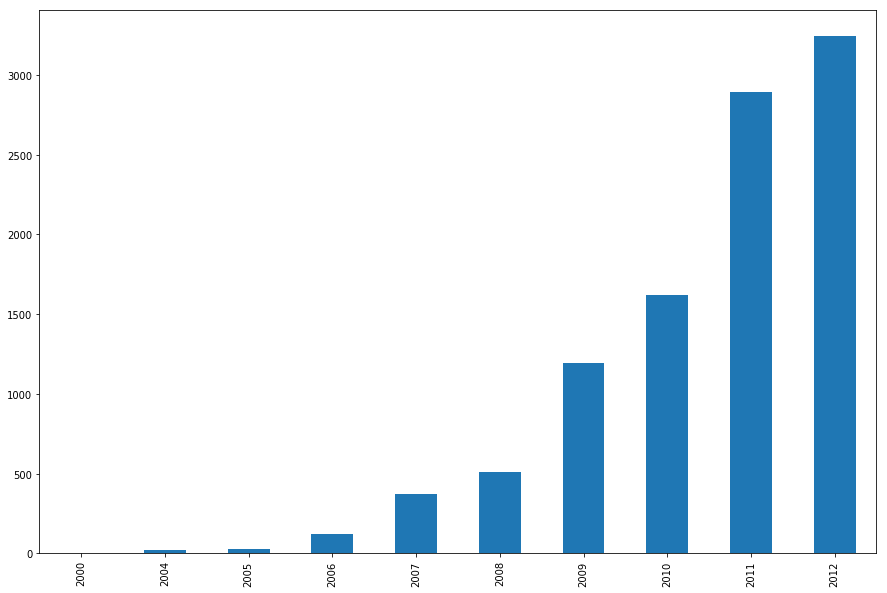

In [104]:
time = pd.to_datetime(pd_data['Time'], unit='s')
time_year = pd.Series([time[i].year for i in range(len(time))])
print(time_year)
ax = time_year.value_counts(ascending=True).plot(kind = 'bar', figsize = (15,10))

In [105]:
pd_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [106]:
pd_datadrop=pd_data.drop(columns=['ProductId','UserId','Summary','ProfileName','Text'])
#pd_data.head(3)

In [107]:
data_co=pd_datadrop.corr(method ='pearson')

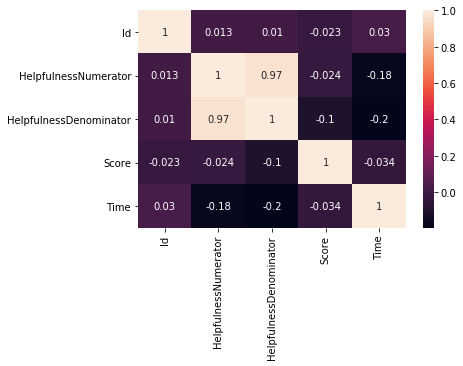

In [108]:
sns.heatmap(data_co, 
          annot=True)

In [109]:

#pd_data_help2=pd_data.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'Score', 'Time', 'Summary', 'Text'
#                                    , 'HelpfulnessNumerator'])#剩分母

#pd_data_help1=pd_data.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'Score', 'Time', 'Summary', 'Text'
#                                    , 'HelpfulnessDenominator'])#剩分子

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


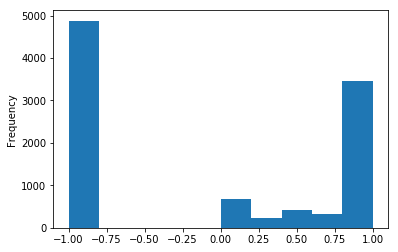

In [110]:
pd_data['Ratio']=pd_data['HelpfulnessNumerator']/pd_data['HelpfulnessDenominator']

pd_data['Ratio'][pd_data['Ratio'].isna()] = -1
pd_data.head()

pd_data_help = pd_data['Ratio'][pd_data['Ratio'].values <= 1]


pd_data_help.plot(kind='hist')
plt.show()